In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
print("Tüm kütüphaneler başarıyla yüklendi!")

Tüm kütüphaneler başarıyla yüklendi!


In [17]:
!pip install tensorflow



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [19]:
import tensorflow as tf
print(tf.__version__)  # TensorFlow sürümünü yazdırır


2.18.0


In [8]:
import pandas as pd

# CSV dosyasını yükle
data = pd.read_csv("train.csv")  # Dosya adını uygun şekilde değiştir

# İlk birkaç satırı gör
print(data.head())

# Veri setinin genel bilgilerini kontrol et
print(data.info())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [21]:
from tensorflow.keras.utils import to_categorical

# Etiketleri kategorik hale getir
y = to_categorical(y, num_classes=10)

print(f"Veri şekli: {X.shape}")
print(f"Etiket şekli: {y.shape}")

Veri şekli: (42000, 28, 28, 1)
Etiket şekli: (42000, 10)


In [23]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test setine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim verisi şekli: {X_train.shape}")
print(f"Test verisi şekli: {X_test.shape}")

Eğitim verisi şekli: (33600, 28, 28, 1)
Test verisi şekli: (8400, 28, 28, 1)


In [27]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(28, 28, 1)),  # İlk katmanda Input nesnesi kullanıyoruz
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train, 
                    epochs=10,  # 10 epoch boyunca eğit
                    validation_data=(X_test, y_test), 
                    batch_size=32)  # Her iterasyonda 32 örnek kullan

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8771 - loss: 0.4018 - val_accuracy: 0.9812 - val_loss: 0.0604
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9817 - loss: 0.0550 - val_accuracy: 0.9854 - val_loss: 0.0490
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9896 - loss: 0.0335 - val_accuracy: 0.9835 - val_loss: 0.0518
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9909 - loss: 0.0275 - val_accuracy: 0.9868 - val_loss: 0.0443
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9953 - loss: 0.0163 - val_accuracy: 0.9855 - val_loss: 0.0473
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9957 - loss: 0.0143 - val_accuracy: 0.9886 - val_loss: 0.0403
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9965 - loss: 0.0104 - val_accuracy: 0.9865 - val_loss: 0.0452
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9974 - loss: 0.0083 - 

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test doğruluk oranı: {test_acc:.2f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9885 - loss: 0.0521
Test doğruluk oranı: 0.99


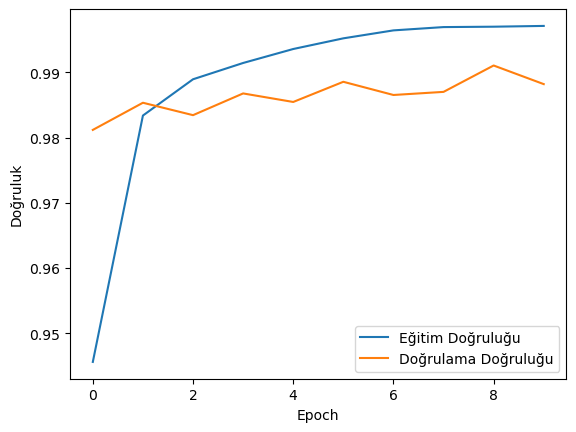

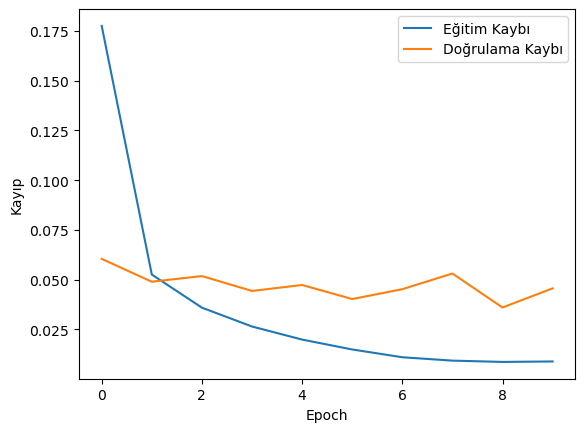

In [35]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluk oranları
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Eğitim ve doğrulama kayıpları
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


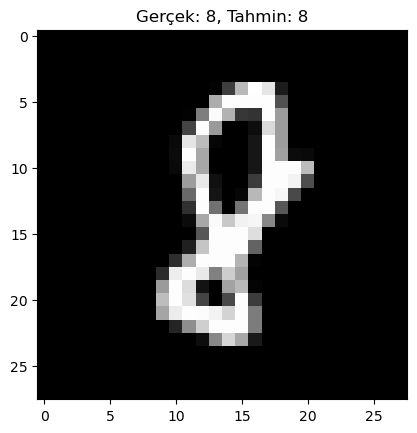

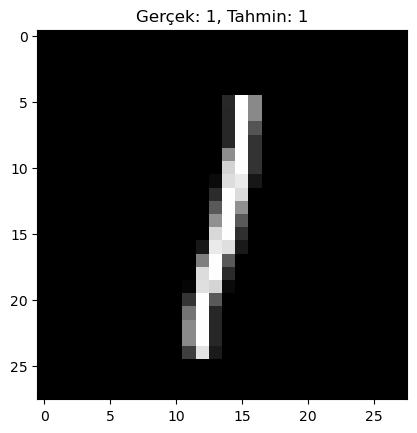

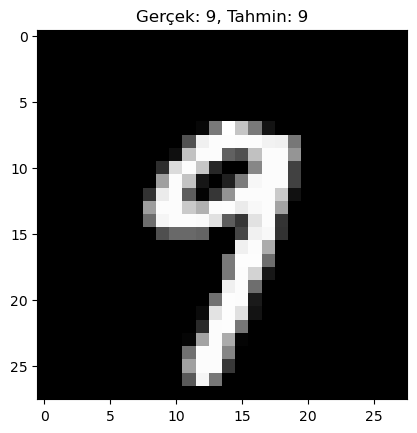

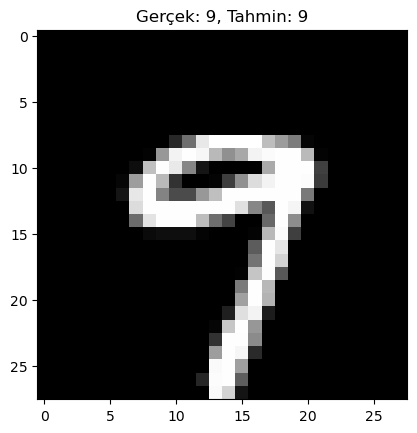

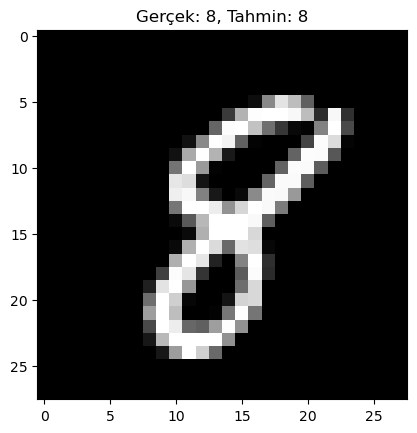

In [37]:
import numpy as np

# Test setinden bazı tahminler
predictions = model.predict(X_test)

# İlk 5 örneği görselleştir
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Gerçek: {np.argmax(y_test[i])}, Tahmin: {np.argmax(predictions[i])}")
    plt.show()

In [43]:
model.save("digit_recognizer_model.keras")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


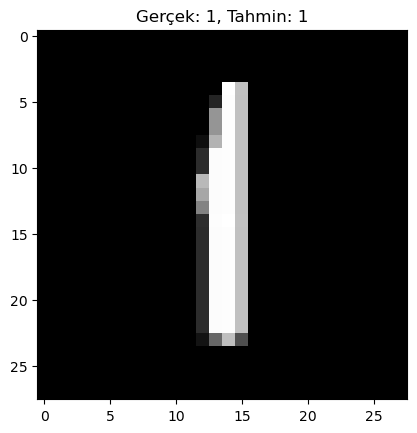

In [45]:
import numpy as np

# Test seti üzerinde tahmin yap
predictions = model.predict(X_test)

# Rastgele bir örneği seç ve sonucu gör
index = np.random.randint(0, len(X_test))
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Gerçek: {np.argmax(y_test[index])}, Tahmin: {np.argmax(predictions[index])}")
plt.show()

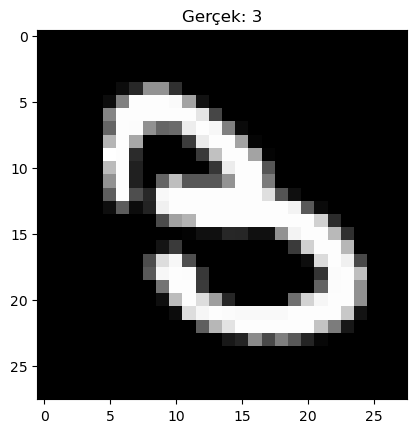

NameError: name 'model' is not defined

In [43]:
# MNIST veri setini yükle
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Veriyi normalize et ve yeniden şekillendir
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Test setinde etiketleri 3 olanları bul
three_indices = np.where(y_test == 3)[0]  # y_test 1D olduğu için doğrudan == kullanabilirsiniz

# İlk 3 örneğini seç
index = three_indices[0]

# Görüntüyü çizdir
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title("Gerçek: 3")
plt.show()

# Tahmin yap
prediction = model.predict(X_test[index].reshape(1, 28, 28, 1))
print(f"Modelin Tahmini: {np.argmax(prediction)}")